# Solution 1
In this solution I used the following data structures and functions:
- <strong>solution</strong> is a numpy matrix where each row represents a knapsack. There actually is one more row than the number of kanpsacks and it represents the left-out items. So the row 0 contains the items which have not been taken. At first each item is left out, I also tried to start with a randomized solution but it could just not converge.
- <strong>tweak</strong> is a funtion that tries to tweak the solution by making a random number of swaps of random items each time. So when tweak is called a random number of random items is selected and they are randomly moved between the knapsacks (even between knapsack 0, so the left out items).
- <strong>fitness</strong> is a function that computes the fitness of a solution. Invalid solutions have negative fitness.

In [2]:
import numpy as np
from random import randint, sample
from copy import deepcopy
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
NUM_KNAPSACKS = 2
NUM_ITEMS = 3
NUM_DIMENSIONS = 2

In [5]:
VALUES = np.random.randint(0, 100, size=NUM_ITEMS)
WEIGHTS = np.random.randint(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = np.random.randint(0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS))

In [6]:
def tweak(solution: np.array) -> np.array:
  s1 = deepcopy(solution)
  # after deepcopying the solution we can perform a random number of swaps
  # of the items in the knapsack

  # we start by picking a random number of items to swap
  random_items = sample(range(0, NUM_ITEMS), k=randint(1, NUM_ITEMS))

  for item in random_items:
    # consider 2 different random bags (if b=0 then we are choosing a left out item)
    b1 = np.where(solution[:, item])[0][0]
    while True:
      b2 = randint(0, NUM_KNAPSACKS-1)
      if b2 != b1:
        break
    # swap the item in the two bags
    s1[b1][item], s1[b2][item] = solution[b2][item], solution[b1][item]

  return s1


In [7]:
def fitness(solution: np.array) -> int:
  # at first we need to compute if the solution is feasible and if it is not we return a negative fitness
  if np.any(solution.sum(axis=0) > 1):
    return -2   # if an object apperas in multiple knapsacks than the algorithm itself is flawed
    
  for k in range(1, NUM_KNAPSACKS+1):        # for each knapsack
    
    items_in_knapsack = solution[k]

    if np.any(items_in_knapsack):           # if there are some items in the knapsack we can compute the total weight
        
        total_weight = WEIGHTS[items_in_knapsack].sum(axis=0)   # compute the total weight for each dimension
        
        if np.any(total_weight > CONSTRAINTS[k-1]):   
            return -1   # the solution violates the weight constraint


  # If the constraints are not violated then we can compute the fitness
  f = 0
  for i, item in enumerate(solution[0]):
    # all the items wich are not left out contribute to the fitness
    if not item:
      f += VALUES[i]    # add the value of the take item

  return f





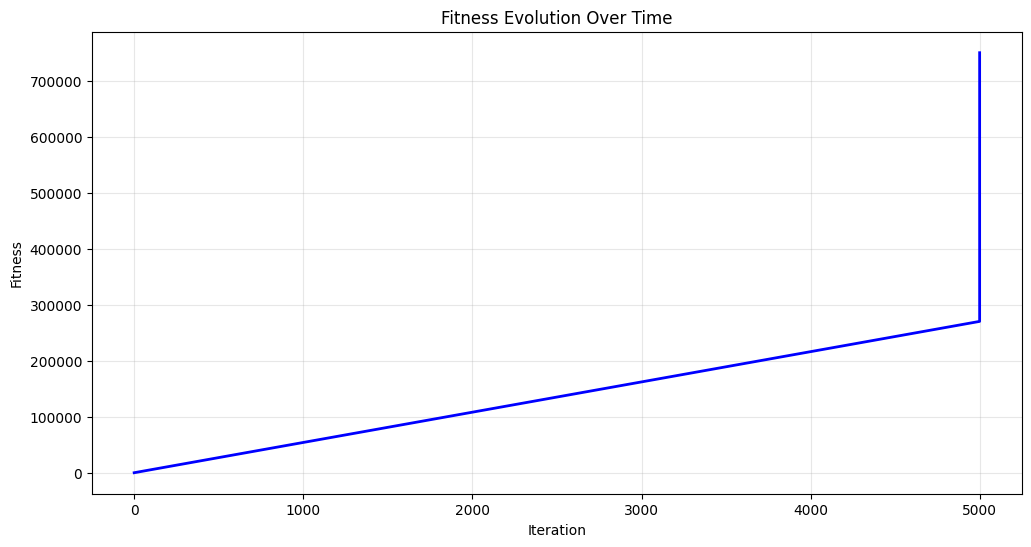


Final Results:
Best Fitness: 750990


In [10]:
# generate a starting solution where each elelement is not taken
# there is an additional knapsack that represents the left out items
solution = np.array([
    [False for _ in range(NUM_ITEMS)] for _ in range(NUM_KNAPSACKS + 1)], dtype=np.bool
)
# the row 0 of the solution represents the tleft out items

for i in range(NUM_ITEMS):
  solution[0][i] = True
  # to randomize it: solution[randint(0, NUM_KNAPSACKS-1)][i] = True

# Lists to track fitness evolution
fitness_history = []
iterations = []

f = fitness(solution)
fitness_history.append(f)
iterations.append(0)

f = fitness(solution)
# for x in tqdm(range(10000)):
for x in range(10000):
  new_sol = tweak(solution)
  f_new = fitness(new_sol)
  if f_new > f:
    f = f_new
    solution = new_sol
    fitness_history.append(f)
    iterations.append(i)
  elif f_new == f:
    solution = new_sol
    fitness_history.append(f)
    iterations.append(i)
  elif f_new == -2:
    raise Exception("Algorithm flaw: an item appears in multiple knapsacks")


# Plot the fitness evolution
plt.figure(figsize=(12, 6))
plt.plot(iterations, fitness_history, 'b-', linewidth=2)
plt.title('Fitness Evolution Over Time')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nFinal Results:")
print(f"Best Fitness: {f}")



# Three problems for testing

In [ ]:
# Problem 1:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 3
NUM_ITEMS = 20
NUM_DIMENSIONS = 2
VALUES = rng.integers(0, 100, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 100, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(0, 100 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS))

In [ ]:
# Problem 2:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 10
NUM_ITEMS = 100
NUM_DIMENSIONS = 10
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(1000 * 2, 1000 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS))

In [8]:
# Problem 3:
rng = np.random.default_rng(seed=42)
NUM_KNAPSACKS = 100
NUM_ITEMS = 5000
NUM_DIMENSIONS = 100
VALUES = rng.integers(0, 1000, size=NUM_ITEMS)
WEIGHTS = rng.integers(0, 1000, size=(NUM_ITEMS, NUM_DIMENSIONS))
CONSTRAINTS = rng.integers(1000 * 10, 1000 * 2 * NUM_ITEMS // NUM_KNAPSACKS, size=(NUM_KNAPSACKS, NUM_DIMENSIONS))